In [1]:
import ROOT as r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit



Welcome to JupyROOT 6.24/02


In [2]:
#insert the file for data extraction

f = r.TFile('results_forAdit_partial_run2c.root')
t = f.Get("LaserEvents/tree")

In [3]:
#creating a dataframe of all data
rdf = r.RDataFrame("LaserEvents/tree", 'results_forAdit_partial_run2c.root')
df = pd.DataFrame(rdf.AsNumpy())

In [25]:
calo = 1
xtal = 1

#data for a single crystal

df_xtal = df.loc[df['caloNum']==calo].loc[df['xtalNum']==xtal]
df_xtal['timeDiff'] = df_xtal['slmTime']-df_xtal['sipmTime']
df_xtal

##which quantity represents hit time??

##first do sipmTime
## lm has two PMTs, look at pmt1


,gpsTimeStamp,cccTimeStamp,runNum,subRunNum,fillNum,bunchNum,fillType,caloNum,xtalNum,sipmTime,...,lmPmtAmp2,lmPmtArea1,lmPmtArea2,lmPmtTime1,lmPmtTime2,slmTime,slmEnergy,slmPedestal,slmChi2,timeDiff
1,1.555163e+09,1.104798e+11,24747,286,170,0,1,1,1,-99392.010702,...,647.36,27649.0,13764.0,5307.0,5495.0,0.000000,4156.962342,-1802.833757,25.956413,99392.010702
55,1.555163e+09,1.104798e+11,24747,286,170,0,1,1,1,15924.695926,...,622.78,28051.0,13209.0,120623.0,120811.0,115316.715980,4220.642623,-1803.291964,21.424950,99392.020053
109,1.555163e+09,1.104798e+11,24747,286,170,0,1,1,1,163928.784434,...,633.52,27757.0,13074.0,268627.0,268815.0,263320.768625,4311.782441,-1803.589453,22.402709,99391.984192
163,1.555163e+09,1.104798e+11,24747,286,170,0,1,1,1,311924.519069,...,664.32,28195.0,13994.0,416623.0,416811.0,411316.532308,4110.290847,-1803.239043,17.337260,99392.013239
217,1.555163e+09,1.104798e+11,24747,286,170,0,1,1,1,459920.508512,...,690.88,28245.0,14451.0,564619.0,564807.0,559312.529802,3901.871303,-1803.231689,21.038682,99392.021291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24294838,1.556089e+09,2.142870e+11,25044,494,54,14,1,1,1,441891.361637,...,625.60,27810.0,13131.0,546611.0,546799.0,541313.378723,3679.224693,-1801.845423,25.861892,99422.017086
24299856,1.556089e+09,2.142874e+11,25044,494,56,15,1,1,1,-99433.369397,...,644.42,27615.0,13717.0,5297.0,5486.0,0.000000,3750.211541,-1802.400277,21.894321,99433.369397
24299910,1.556089e+09,2.142874e+11,25044,494,56,15,1,1,1,147880.023091,...,646.94,27809.0,13593.0,252611.0,252799.0,247313.354961,3618.812748,-1802.008501,26.734179,99433.331870
24299964,1.556089e+09,2.142874e+11,25044,494,56,15,1,1,1,295883.907302,...,672.28,27276.0,14110.0,400615.0,400803.0,395317.264406,3706.818512,-1802.350833,26.660170,99433.357103


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h_53 (Potential memory leak).


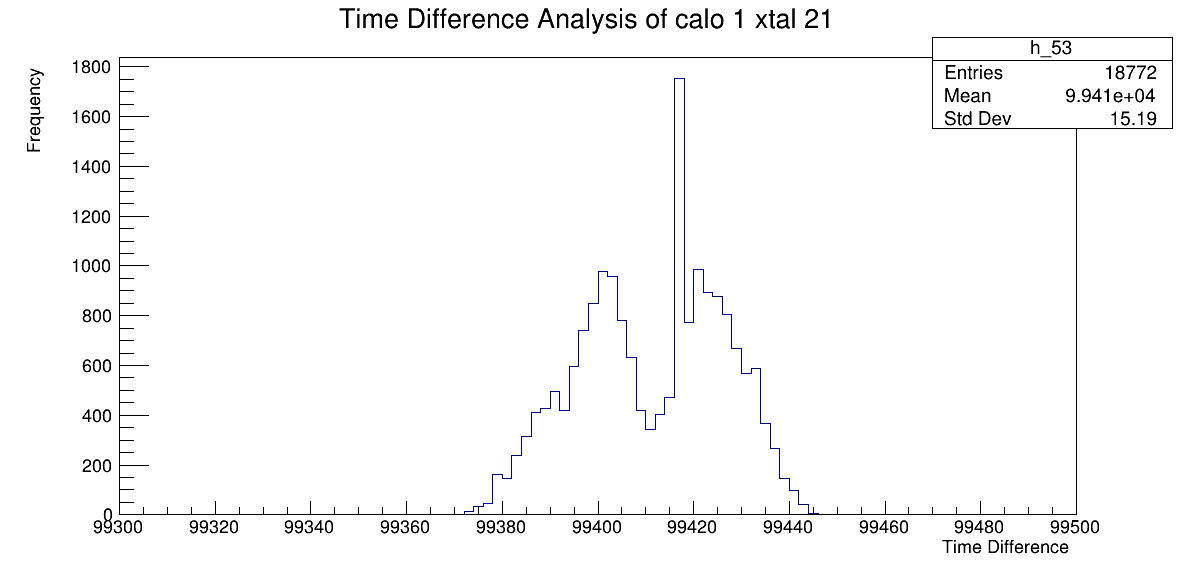

In [41]:
#Creating a canvas and an empty histogram object
nBins = 100
xLow = 99300
xHigh = 99500
i = xtal + (calo-1)*54

c = r.TCanvas("c","Time Datas", 1200,600) 

h = r.TH1D( f"h_{i}",  "Time Difference Analysis of calo 1 xtal 21 ; Time Difference; Frequency ",nBins,xLow, xHigh)

#filling data of one particular crystal from one calo (do we need single fill?)
for x in df_xtal['timeDiff']:
    h.Fill(x)

h.Draw() 
c.Draw()

 FCN=4710.92 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=3.48617e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.77641e+02   7.22034e+00   2.20274e-01   5.38281e-05
   2  Mean         9.94102e+04   1.27373e-01   4.74025e-02   4.57230e-03
   3  Sigma        1.45044e+01   6.00487e-02   4.10343e-05  -2.31991e-01


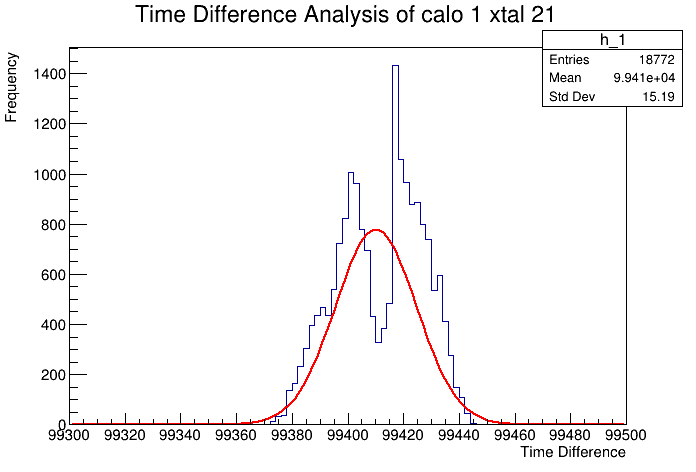

In [17]:
#fitting a gaussian function in the data to find the avg time difference across many fills
func = r.TF1("Gaussian","gaus", -1,1)
c = r.TCanvas()
h.Fit(func)
h.Draw()
c.Draw()

#extracting the mean and the std
mean_single = func.GetParameter(1)
std_single = func.GetParError(1)

In [28]:
calo = 1
mean_calo = np.zeros(54)
std_calo = np.zeros(54)

#data for a single calo, all crystals
for xtal in pd.unique(df['xtalNum']):
    
    df_xtal = df.loc[df['caloNum']==calo].loc[df['xtalNum']==xtal]
    df_xtal['timeDiff'] = df_xtal['slmTime']-df_xtal['sipmTime']

    i = xtal + (calo-1)*54
    h_temp = r.TH1D( f"h_{i}",  "Time Difference Analysis of calo 1 xtal 21 ; Time Difference; Frequency ",nBins,xLow, xHigh)

    #filling data of one particular crystal from one calo (do we need single fill?)
    for x in df_xtal['timeDiff']:
        h_temp.Fill(x)


    #fitting a gaussian function in the data to find the avg time difference across many fills
    func = r.TF1("Gaussian","gaus", -1,1)
    c = r.TCanvas()
    h_temp.Fit(func)

    #extracting the mean and the std
    mean_calo[xtal] = func.GetParameter(1)
    std_calo[xtal] = func.GetParError(1)



 FCN=4756.6 FROM MIGRAD    STATUS=CONVERGED      86 CALLS          87 TOTAL
                     EDM=4.29617e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.75041e+02   7.20873e+00   2.21008e-01  -1.07066e-05
   2  Mean         9.94102e+04   1.27568e-01   4.74025e-02   4.63263e-04
   3  Sigma        1.45050e+01   6.01894e-02   4.13721e-05  -3.47776e-02
 FCN=4710.92 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=3.48617e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.77641e+02   7.22034e+00   2.20274e-01   5.38281e-05
   2  Mean         9.94102e+04   1.27373e-01   4.74025e-02   4.57230e-03
   3  Sigma        1.45044e+01   6

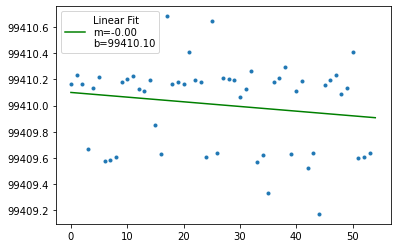

In [39]:
from scipy.optimize import curve_fit


plt.plot(pd.unique(df['xtalNum']), mean_calo, '.')



def func(x,m,b):
    return m*x + b 

initial_guess = [1.2, 0.03]
pars, pcov = curve_fit(func, pd.unique(df['xtalNum']), mean_calo, p0=initial_guess)
xfit = np.linspace(0,54)
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'g-',label=f"Linear Fit\nm={pars[0]:.2f}\nb={pars[1]:.2f}")
ax.set_title("Time Difference Analysis")
ax.set_xlabel("caloNum")
ax.set_ylabel("Mean time diff b/w ")
plt.legend()


Text(0, 0.5, 'slmTime - sipmTime')

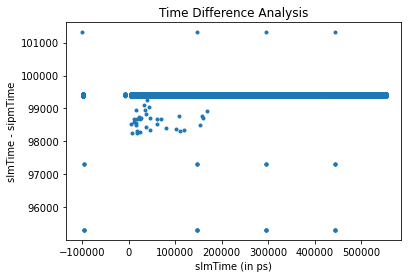

In [24]:
fig,ax = plt.subplots()
ax.plot(df_xtal['sipmTime'], df_xtal['timeDiff'],".")
ax.set_title("Time Difference Analysis")
ax.set_xlabel("slmTime (in ps)")
ax.set_ylabel("slmTime - sipmTime")